In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)


2.11.0
2.11.0


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
import random

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from keras.models import Sequential, load_model, Model
from keras import layers, optimizers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.utils.image_utils import img_to_array
from keras.applications.vgg16 import VGG16

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical

# Configure visualisations
%matplotlib inline

In [3]:
from PIL import Image 
from glob import glob
import tensorflow as tf

In [4]:
print(tf.test.gpu_device_name())
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
!cat /proc/meminfo

/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1724118060843644808
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16105865216
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14481080612791228316
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]
MemTotal:       16390844 kB
MemFree:         8783144 kB
MemAvailable:   14686520 kB
Buffers:         1066612 kB
Cached:          4776716 kB
SwapCached:            0 kB
Active:          1359260 kB
Inactive:        5522192 kB
Active(anon):        684 kB
Inactive(anon):  1046520 kB
Active(file):    1358576 kB
Inactive(file):  4475672 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              7280 kB
Writeback:           112 kB
AnonPages:       1038028 kB
Mapped:           680932 kB
Shmem:        

In [5]:
fname = os.listdir('/kaggle/input/bin-with-test/data_bin/')
random.shuffle(fname)
img_files = []
for filename in fname:
  if filename.endswith("JPG"):
    img_files.append(filename)
print(img_files)


['deer-img78.JPG', 'badger-img95.JPG', 'badger-img58.JPG', 'badger-img99.JPG', 'badger-img46.JPG', 'badger-img54.JPG', 'badger-img55.JPG', 'badger-img3.JPG', 'badger-img19.JPG', 'deer-img45.JPG', 'deer-img25.JPG', 'badger-img86.JPG', 'deer-img28.JPG', 'badger-img17.JPG', 'badger-img78.JPG', 'deer-img67.JPG', 'deer-img96.JPG', 'badger-img20.JPG', 'badger-img96.JPG', 'deer-img57.JPG', 'badger-img72.JPG', 'deer-img16.JPG', 'deer-img21.JPG', 'deer-img29.JPG', 'badger-img43.JPG', 'deer-img99.JPG', 'deer-img80.JPG', 'deer-img65.JPG', 'badger-img94.JPG', 'deer-img19.JPG', 'deer-img76.JPG', 'deer-img59.JPG', 'badger-img52.JPG', 'deer-img37.JPG', 'badger-img24.JPG', 'deer-img26.JPG', 'deer-img38.JPG', 'deer-img44.JPG', 'deer-img8.JPG', 'badger-img80.JPG', 'badger-img79.JPG', 'badger-img60.JPG', 'badger-img35.JPG', 'deer-img92.JPG', 'deer-img43.JPG', 'badger-img34.JPG', 'deer-img7.JPG', 'badger-img1.JPG', 'deer-img12.JPG', 'deer-img60.JPG', 'deer-img22.JPG', 'deer-img2.JPG', 'badger-img100.JPG',

In [6]:
label = []
for label_path in img_files:
    label_p = label_path.split('.')[0]
    label_path = '/kaggle/input/bin-with-test/data_bin/'+label_p + '.txt'
    label_file = open(label_path, 'r')
    label_text = label_file.read().strip().split()
    class_label = int(label_text[0])
    label.append(class_label)
print(label)


[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0]


In [7]:
import os
from PIL import Image
print(img_files)

['deer-img78.JPG', 'badger-img95.JPG', 'badger-img58.JPG', 'badger-img99.JPG', 'badger-img46.JPG', 'badger-img54.JPG', 'badger-img55.JPG', 'badger-img3.JPG', 'badger-img19.JPG', 'deer-img45.JPG', 'deer-img25.JPG', 'badger-img86.JPG', 'deer-img28.JPG', 'badger-img17.JPG', 'badger-img78.JPG', 'deer-img67.JPG', 'deer-img96.JPG', 'badger-img20.JPG', 'badger-img96.JPG', 'deer-img57.JPG', 'badger-img72.JPG', 'deer-img16.JPG', 'deer-img21.JPG', 'deer-img29.JPG', 'badger-img43.JPG', 'deer-img99.JPG', 'deer-img80.JPG', 'deer-img65.JPG', 'badger-img94.JPG', 'deer-img19.JPG', 'deer-img76.JPG', 'deer-img59.JPG', 'badger-img52.JPG', 'deer-img37.JPG', 'badger-img24.JPG', 'deer-img26.JPG', 'deer-img38.JPG', 'deer-img44.JPG', 'deer-img8.JPG', 'badger-img80.JPG', 'badger-img79.JPG', 'badger-img60.JPG', 'badger-img35.JPG', 'deer-img92.JPG', 'deer-img43.JPG', 'badger-img34.JPG', 'deer-img7.JPG', 'badger-img1.JPG', 'deer-img12.JPG', 'deer-img60.JPG', 'deer-img22.JPG', 'deer-img2.JPG', 'badger-img100.JPG',

In [8]:
# size = (400, 400)
# for file_name in img_files:
#     file_path = file_name
#     image = Image.open(file_path)
#     new_image = image.resize(size)
#     new_image.save(file_path)


<AxesSubplot:>

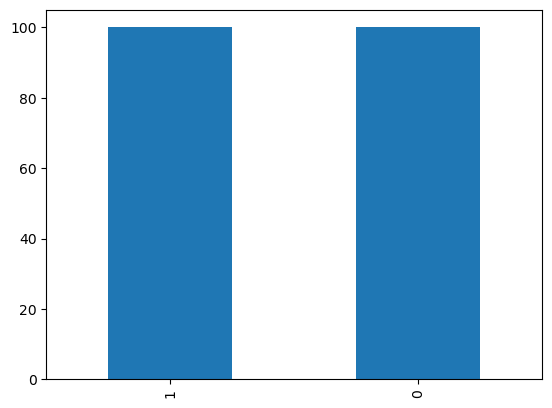

In [9]:
df = pd.DataFrame({ 'filename': img_files, 'label': label })
df['label'].value_counts().plot.bar()

In [10]:
print(df.shape)

(200, 2)


In [11]:
train_df, val_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index()
val_df = val_df.reset_index()

In [12]:
train_df = train_df.drop(['index'], axis = 1)
val_df = val_df.drop(['index'], axis = 1)
print(train_df.shape, val_df.shape)

(160, 2) (40, 2)


In [13]:
train_df['label'] = train_df['label'].astype('str')
val_df['label'] = val_df['label'].astype('str')

print(train_df.head())
print(val_df.head())
print(train_df.info(), val_df.info())

           filename label
0  badger-img18.JPG     0
1  badger-img94.JPG     0
2  badger-img44.JPG     0
3    deer-img41.JPG     1
4    deer-img82.JPG     1
           filename label
0    deer-img16.JPG     1
1  badger-img36.JPG     0
2    deer-img78.JPG     1
3    deer-img50.JPG     1
4  badger-img21.JPG     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  160 non-null    object
 1   label     160 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  40 non-null     object
 1   label     40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes
None None


In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.25,  # randomly shift images horizontally
        height_shift_range=0.25,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        rescale=1./255, # rescale between 0 and 1
)  

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1470: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  "This ImageDataGenerator specifies "


In [16]:
train_generator = datagen.flow_from_dataframe(
                dataframe = train_df, # name of dataframe
                directory = "/kaggle/input/bin-with-test/data_bin/", # direcory where images are stored/
                x_col = "filename", # name of the file is stored in x_col
                y_col = "label", # label in y_col
                batch_size = 64, # size of batches of data
                seed = 5, # random no for shuffling and transformation
                shuffle = True, # whether to shuffle the data or not
                class_mode = "binary", # binary implies 4 classes are present
                target_size=(400, 400) # target size of images
) 

Found 160 validated image filenames belonging to 2 classes.


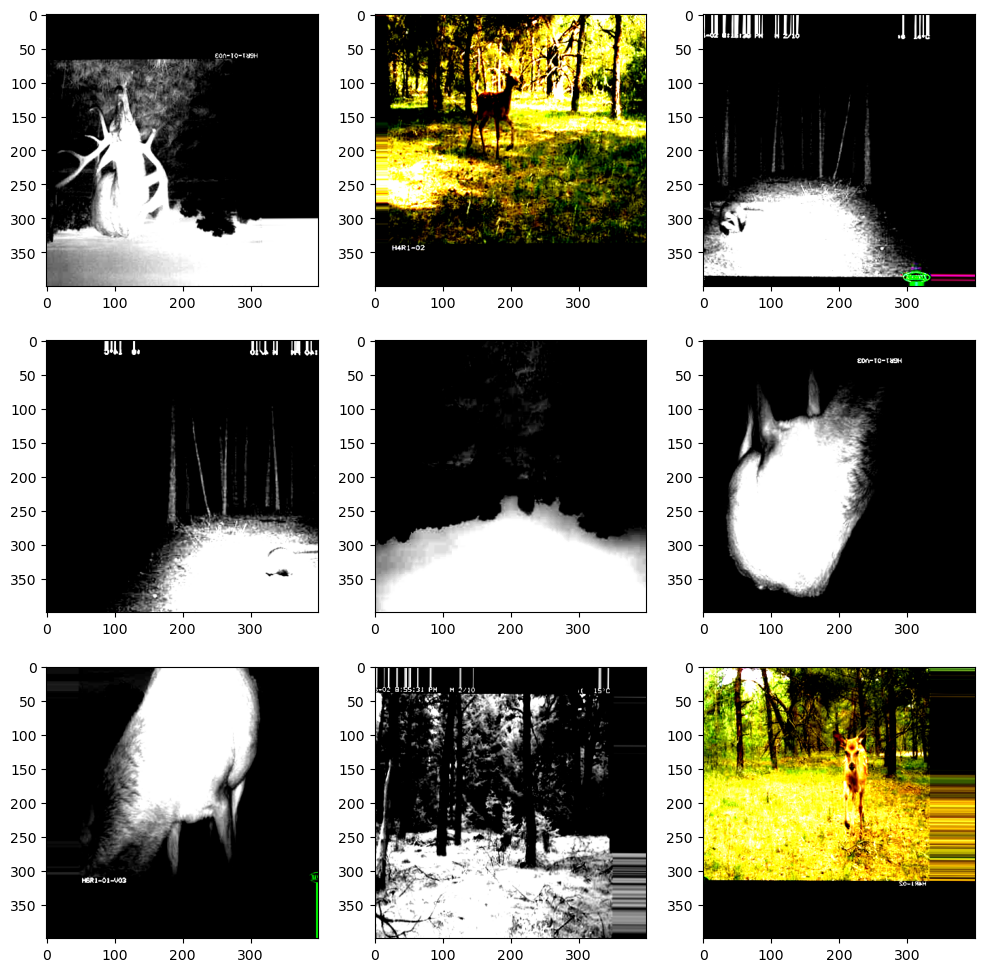

In [17]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_img, Y_img in train_generator:
        image = X_img[0]
        plt.imshow(image)
        break
plt.show()

In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
                dataframe = val_df, # name of dataframe
                directory = "/kaggle/input/bin-with-test/data_bin/", # direcory where images are stored
                x_col = "filename", # name of the file is stored in x_col
                y_col = "label", # label in y_col
                batch_size = 64, # size of batches of data
                class_mode = "binary", # binary implies 4 classes are present
                target_size=(400, 400) # target size of images
) 

Found 40 validated image filenames belonging to 2 classes.


In [19]:
tname= os.listdir('/kaggle/input/bin-with-test/test')
random.shuffle(tname)
print(len(tname))

48


In [20]:
test_files = []
for filename in tname:
    if filename.endswith("JPG"):
        test_files.append(filename)
print(len(test_files))

24


In [21]:
# size = (400, 400)
# for file_name in test_files:
#     file_path = file_name
#     image = Image.open(file_path)
#     new_image = image.resize(size)
#     new_image.save(file_path)

In [22]:
test_df = pd.DataFrame({ 'filename': test_files })
test_df
# test_df.to_csv('results.csv')
print(test_files)

['IMG_1834.JPG', 'deer-img31.JPG', 'IMG_1781.JPG', 'IMG_1832.JPG', 'IMG_1841.JPG', 'deer-img20.JPG', 'deer-img29.JPG', 'deer-img22.JPG', 'deer-img26.JPG', 'IMG_1831.JPG', 'deer-img33.JPG', 'deer-img34.JPG', 'IMG_1784.JPG', 'deer-img27.JPG', 'IMG_1783.JPG', 'IMG_1842.JPG', 'IMG_1785.JPG', 'IMG_1833.JPG', 'deer-img23.JPG', 'deer-img3.JPG', 'deer-img25.JPG', 'IMG_1843.JPG', 'IMG_1844.JPG', 'IMG_1782.JPG']


In [23]:
label_actual = []
for label_path in test_files:
    label_p = label_path.split('.')[0]
    label_path = '/kaggle/input/bin-with-test/test/'+ label_p + '.txt'
    label_file = open(label_path, 'r')
    label_text = label_file.read().strip().split()
    class_label = int(label_text[0])
    if class_label == 0:
      class_label = 1
    elif class_label == 1:
      class_label = 0
    label_actual.append(class_label)

Y_test_actual = np.asarray(label_actual)
print(len(Y_test_actual))

24


In [24]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
              dataframe = test_df, # name of dataframe
              directory = "/kaggle/input/bin-with-test/test/", # direcory where images are stored
              x_col = "filename", # name of the file is stored in x_col
              y_col = None, # label in y_col
              # batch_size = 16, # size of batches of data
              class_mode = None, # binary implies 2 classes are present
              target_size = (400, 400), # target size of images
              # shuffle = False
)

Found 24 validated image filenames.


In [25]:
from keras.applications import VGG16

image_size = 400
input_shape = (image_size, image_size, 3)

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                              

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [27]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit_generator((train_generator), epochs=15, 
                              validation_data = (validation_generator), verbose=1, 
#                               batch_size = 100,
                              # steps_per_epoch = 5,
                              callbacks = [reduce_lr, early_stopping])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
3/3 [==============================] - 47s 10s/step - loss: 0.9398 - accuracy: 0.4938 - val_loss: 0.7152 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/15
3/3 [==============================] - 9s 2s/step - loss: 0.7906 - accuracy: 0.5750 - val_loss: 0.6776 - val_accuracy: 0.6750 - lr: 9.0000e-04
Epoch 3/15
3/3 [==============================] - 9s 4s/step - loss: 0.6099 - accuracy: 0.6812 - val_loss: 0.6793 - val_accuracy: 0.6250 - lr: 8.1000e-04
Epoch 4/15
3/3 [==============================] - 8s 3s/step - loss: 0.5795 - accuracy: 0.7312 - val_loss: 0.6776 - val_accuracy: 0.5750 - lr: 7.2900e-04
Epoch 5/15
3/3 [==============================] - 8s 2s/step - loss: 0.4720 - accuracy: 0.7625 - val_loss: 0.6392 - val_accuracy: 0.7250 - lr: 6.5610e-04
Epoch 6/15
3/3 [==============================] - 9s 2s/step - loss: 0.4403 - accuracy: 0.7625 - val_loss: 0.5968 - val_accuracy: 0.6500 - lr: 5.9049e-04
Epoch 7/15
3/3 [==============================] - 9s 2s/step - loss: 0.3759 - 

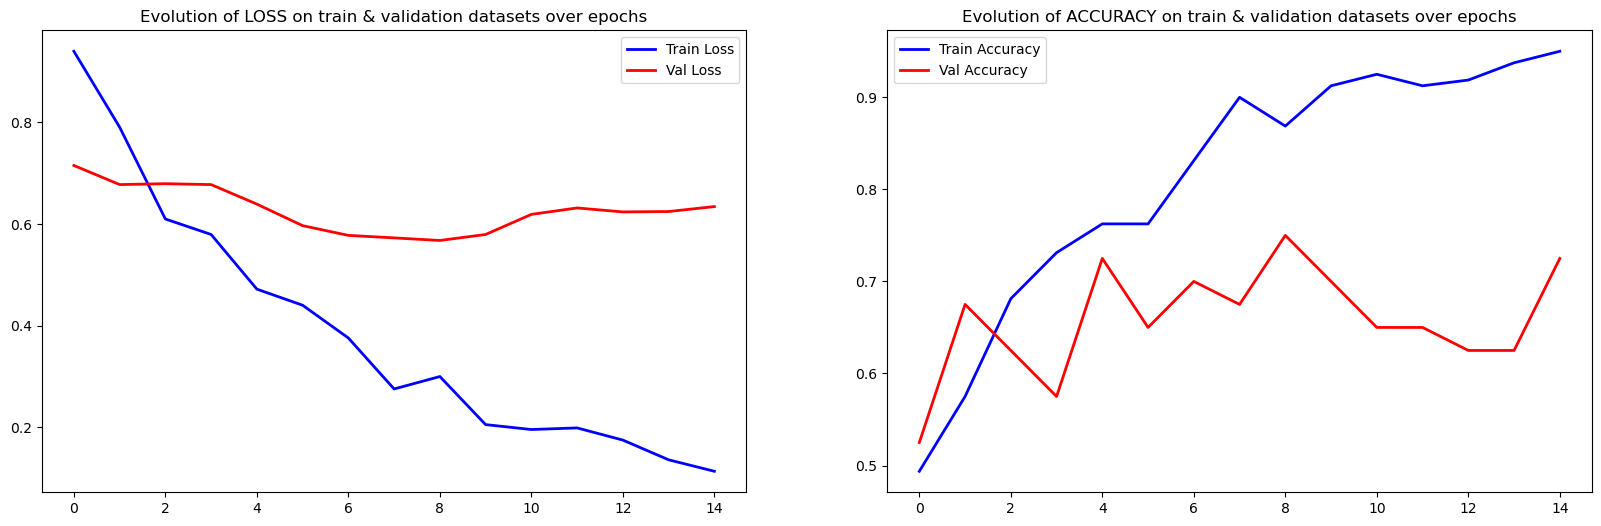

In [28]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [29]:
loss, accuracy = model.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Validation: accuracy = 0.725000  ;  loss = 0.634349 


In [30]:
Y_val = val_df['label']
Y_val = np.asarray(Y_val)
y_pred =  model.predict_generator(validation_generator)
y_final = np.where(y_pred > 0.5, 1,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
predict = model.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[['1']
 ['0']
 ['0']
 ['0']
 ['0']
 ['1']
 ['1']
 ['1']
 ['1']
 ['0']
 ['1']
 ['1']
 ['1']
 ['1']
 ['0']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['0']
 ['1']
 ['0']
 ['1']]


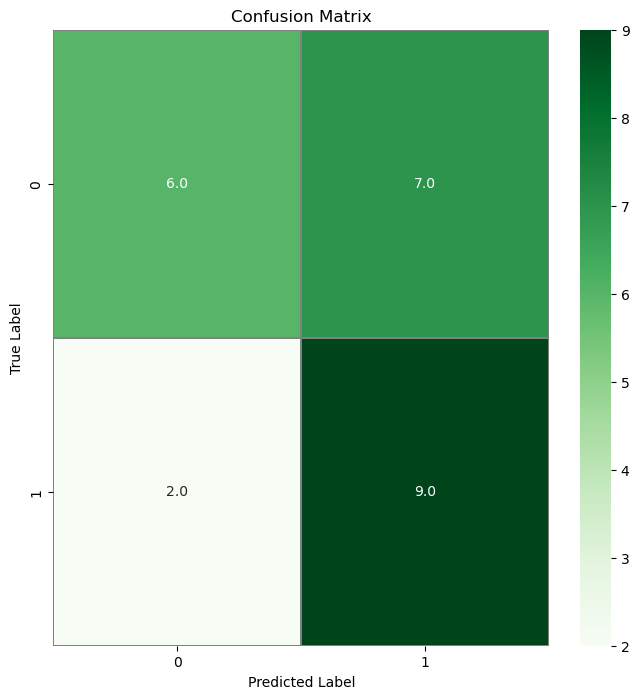

In [32]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
# print(Y_test_actual)
Y_test_pred = Y_test_pred.astype('str')
print(Y_test_pred)
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
report = classification_report(Y_test_actual, Y_test_pred, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.56      0.82      0.67        11

    accuracy                           0.62        24
   macro avg       0.66      0.64      0.62        24
weighted avg       0.66      0.62      0.62        24



In [34]:
from keras.applications import VGG16

image_size = 400
input_shape = (image_size, image_size, 3)

pre_trained_model2 = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model2.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model2.layers[15:]:
    layer.trainable = True
    
for layer in pre_trained_model2.layers:
  print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [35]:
last_layer = pre_trained_model2.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

VGG16model_finetuned = Model(pre_trained_model2.input, x)

VGG16model_finetuned.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

VGG16model_finetuned.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 100, 128)     0   

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = VGG16model_finetuned.fit_generator((train_generator), epochs=25, 
                              validation_data = (validation_generator), verbose=1, 
                              callbacks = [early_stopping]
                              )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
3/3 [==============================] - 9s 3s/step - loss: 0.9508 - accuracy: 0.4938 - val_loss: 0.7100 - val_accuracy: 0.4500
Epoch 2/25
3/3 [==============================] - 7s 3s/step - loss: 0.5608 - accuracy: 0.7250 - val_loss: 0.6965 - val_accuracy: 0.5250
Epoch 3/25
3/3 [==============================] - 7s 2s/step - loss: 0.4169 - accuracy: 0.8188 - val_loss: 0.6474 - val_accuracy: 0.7000
Epoch 4/25
3/3 [==============================] - 7s 2s/step - loss: 0.3404 - accuracy: 0.8438 - val_loss: 0.5924 - val_accuracy: 0.6750
Epoch 5/25
3/3 [==============================] - 7s 3s/step - loss: 0.2033 - accuracy: 0.9250 - val_loss: 0.5643 - val_accuracy: 0.7250
Epoch 6/25
3/3 [==============================] - 8s 2s/step - loss: 0.1640 - accuracy: 0.9563 - val_loss: 0.5308 - val_accuracy: 0.7500
Epoch 7/25
3/3 [==============================] - 7s 3s/step - loss: 0.1199 - accuracy: 0.9500 - val_loss: 0.5793 - val_accuracy: 0.7750
Epoch 8/25
3/3 [=========================

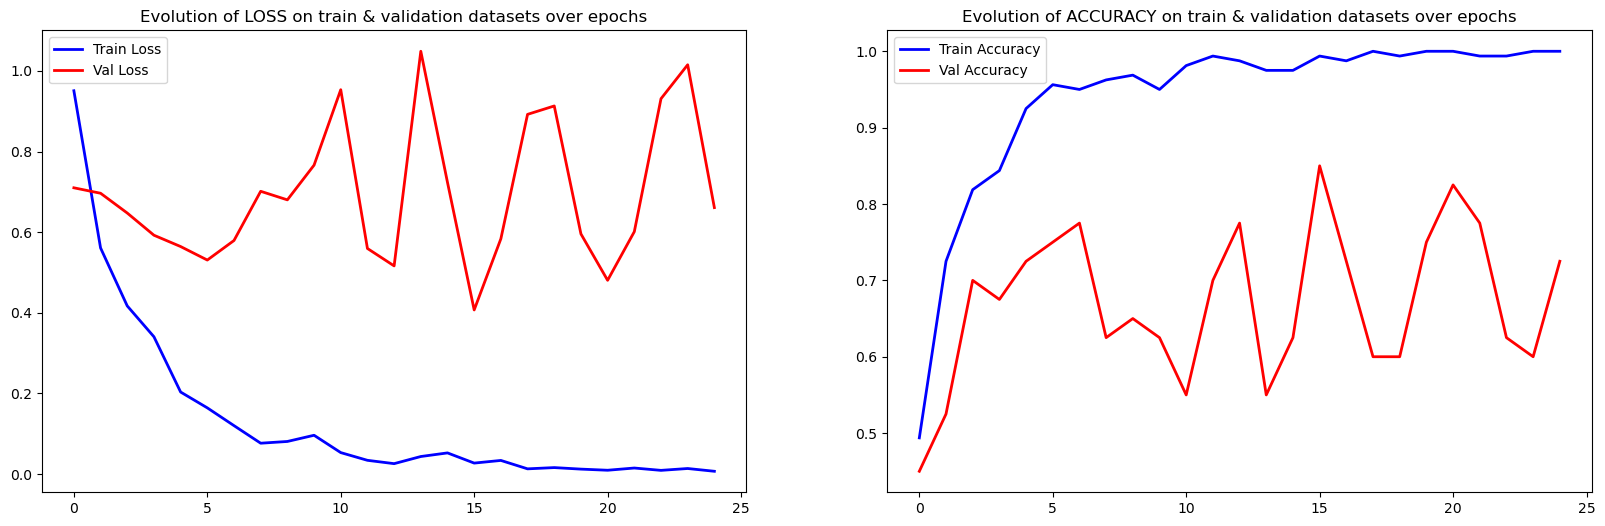

In [37]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [38]:
loss, accuracy = VGG16model_finetuned.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Validation: accuracy = 0.725000  ;  loss = 0.660890 


In [39]:
predict = VGG16model_finetuned.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


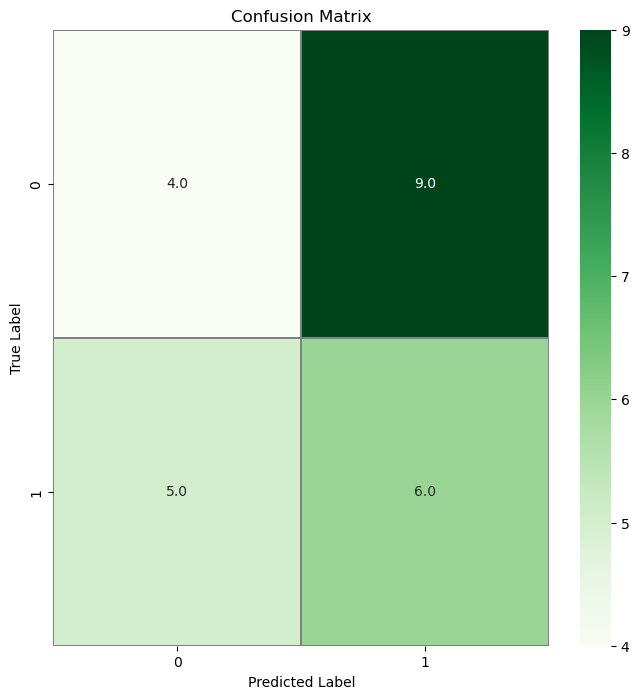

In [40]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
Y_test_pred = Y_test_pred.astype('str')
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
